In [58]:
import ast
import pandas as pd
import matplotlib.pyplot as plt 
from datasets import load_dataset
import seaborn as sns
from matplotlib.ticker import PercentFormatter

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df.job_posted_date = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

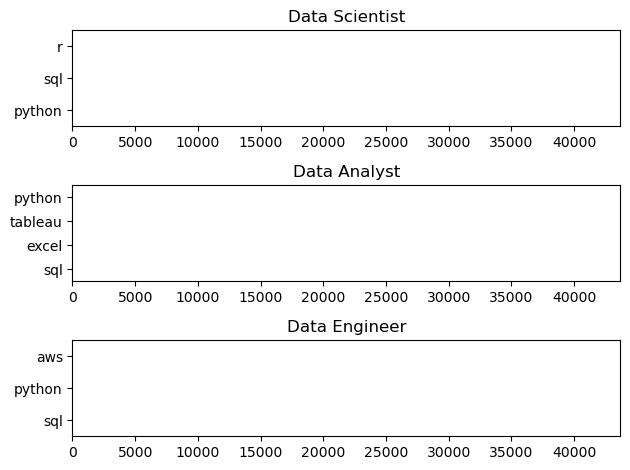

In [22]:
df_US = df[df['job_country'] == "United States"]
df_exploded = df_US.explode('job_skills')
df_exploded
df_grouped = df_exploded.groupby(by=['job_title_short','job_skills']).size()
df_grouped = df_grouped.reset_index(name='skill_count')
df_grouped.sort_values('skill_count',ascending=False,inplace=True)

job_titles = df_grouped.job_title_short.unique().tolist()
job_titles = job_titles[:3]
fig,ax = plt.subplots(len(job_titles),1)
max_x = df_grouped['skill_count'].max()
for i,job_title in enumerate(job_titles):
    df_plot =  df_skill_percent[df_skill_percent['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,max_x*1.03)
    ax[i].legend().set_visible(False)
fig.tight_layout()

In [29]:
df_job_count = df_US['job_title_short'].value_counts().reset_index(name='Count_of_jobs')

df_skill_percent = pd.merge(df_grouped,df_job_count)
df_skill_percent['skill_percent'] = (100*df_skill_percent['skill_count']/df_skill_percent['Count_of_jobs']).round(1)
df_skill_percent.sort_values(by='skill_percent',ascending=False)

,job_title_short,job_skills,skill_count,Count_of_jobs,skill_percent
19,Senior Data Scientist,python,9816,12946,75.8
0,Data Scientist,python,42379,58830,72.0
29,Senior Data Engineer,python,6692,9289,72.0
30,Senior Data Engineer,sql,6651,9289,71.6
269,Machine Learning Engineer,python,644,921,69.9
...,...,...,...,...,...
1511,Senior Data Engineer,drupal,4,9289,0.0
1509,Senior Data Analyst,elasticsearch,4,11791,0.0
1507,Data Analyst,erlang,4,67816,0.0
1504,Data Scientist,chainer,4,58830,0.0


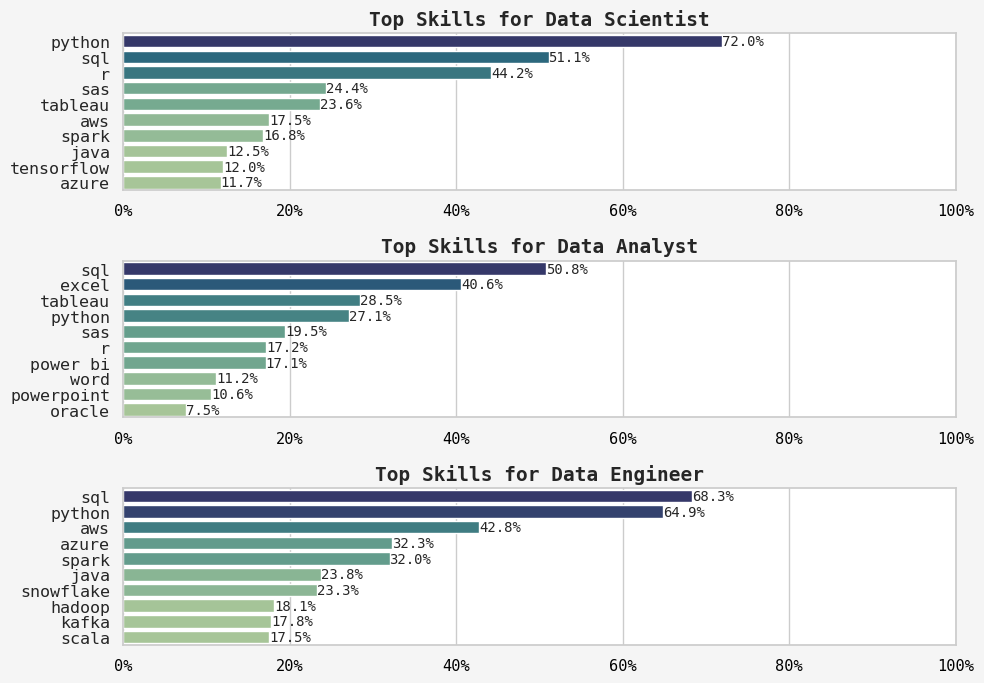

In [85]:
df_US = df[df['job_country'] == "United States"]
df_exploded = df_US.explode('job_skills')
df_exploded
df_grouped = df_exploded.groupby(by=['job_title_short','job_skills']).size()
df_grouped = df_grouped.reset_index(name='skill_count')
df_grouped.sort_values('skill_count',ascending=False,inplace=True)

job_titles = df_grouped.job_title_short.unique().tolist()
job_titles = job_titles[:3]
fig,ax = plt.subplots(len(job_titles),1,figsize=(10,7))
for i,job_title in enumerate(job_titles):
    df_plot =  df_skill_percent[df_skill_percent['job_title_short'] == job_title].head(10)
    sns.barplot(df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='crest')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,100)
    ax[i].xaxis.set_major_formatter(PercentFormatter(xmax=100))
    ax[i].legend().set_visible(False)
    ax[i].set_title('Top Skills for ' + job_title, fontsize=14, fontweight='bold', family='DejaVu Sans Mono')
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='x', labelsize=11,)
    for label in ax[i].get_xticklabels():
        label.set_fontsize(11)
        label.set_fontfamily('DejaVu Sans Mono')
        label.set_color('black')
    ax[i].tick_params(axis='y', labelsize=12)
    for label in ax[i].get_yticklabels():
        label.set_fontsize(12)
        label.set_fontfamily('DejaVu Sans Mono')
    sns.set_theme(style="whitegrid")

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v,n,f'{v}%',va='center',fontsize=10,fontfamily='DejaVu Sans Mono')
fig.tight_layout()
fig.patch.set_facecolor("whitesmoke")